# Dataset Drugs200.csv
Sherly Santiadi

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/drug200.csv"

import pandas as pd

dataframe=pd.read_csv(path)
dataframe.head()

Mounted at /content/drive


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Count Certain Class

In [ ]:
dataframe["Drug"].value_counts() 

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
dataframe.shape

(200, 6)

# Visualize Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


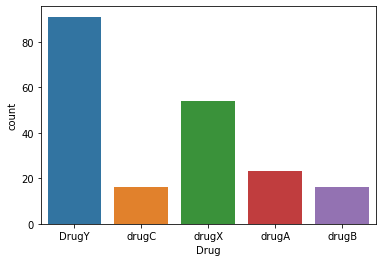

In [ ]:
# Plotting Purchased Bike
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

plt.figure(figsize = (6,4))
sns.countplot(dataframe['Drug'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d16b1be90>,
      dtype=object)

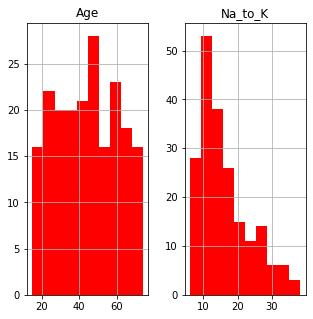

In [ ]:
x=dataframe.drop('Drug', axis=1)
y=dataframe['Drug']
x.hist(figsize=(5,5),  color = "red")

# Checking For Null-Entry Data
There is no null-entry data

In [ ]:
dataframe.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Selecting Features (5) & Label (1)
X = age, sex, BP, Cholestrol, Na_to_K

y = Drug

In [ ]:
import numpy as np
# axis=1 : column
# using drop because it's better to drop what column we don't need instead of adding one by one what column that we need
X = dataframe.drop(['Drug'],axis=1)
X.shape

(200, 5)

In [ ]:
y= dataframe['Drug'].values[:,np.newaxis]
y.shape

(200, 1)

In [ ]:
X.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355


# Selecting Features (2) and Label (1)
X_2 = Cholesterol,Na_to_K

y = Drug

In [ ]:
dataframe.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
X_2 = dataframe[["Cholesterol","Na_to_K"]]
X_2.shape

(200, 2)

# Label Encoder for y (target) .Unique()
y_LE

In [ ]:
dataframe['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame({'index':[0,1,2,3,4],
        'drugs':['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']})
data['drugs_encoded'] = le.fit_transform(data['drugs'].values)
data = data.drop_duplicates('drugs').set_index('index')
print(data)

       drugs  drugs_encoded
index                      
0      DrugY              0
1      drugC              3
2      drugX              4
3      drugA              1
4      drugB              2


In [ ]:
dataframe['Drug LE'] = le.fit_transform(dataframe['Drug'])

In [ ]:
dataframe.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug LE
0,23,F,HIGH,HIGH,25.355,DrugY,0


In [ ]:
y_LE= dataframe['Drug LE'].values[:,np.newaxis]
y_LE.shape

(200, 1)

# Ordinal Encoding Using Features (5)
X_copy

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# X_copy is copying from variable dataframe
X_copy = X.copy()
X_copy.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [ ]:
ordinal_encoder = OrdinalEncoder()
s = (X_copy.dtypes == 'object')
object_cols_X = list(s[s].index)
X_copy[object_cols_X] = ordinal_encoder.fit_transform(X[object_cols_X])
X_copy.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093


# Ordinal Encoding Using Features (2)
X_2_copy

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# X_copy is copying from variable dataframe
X_2_copy = X_2.copy()
X_2_copy.head(2)

,Cholesterol,Na_to_K
0,HIGH,25.355
1,HIGH,13.093


In [ ]:
ordinal_encoder = OrdinalEncoder()
s = (X_2_copy.dtypes == 'object')
object_cols_X_2 = list(s[s].index)
X_2_copy[object_cols_X_2] = ordinal_encoder.fit_transform(X[object_cols_X_2])
X_2_copy.head(2)

,Cholesterol,Na_to_K
0,0.0,25.355
1,0.0,13.093


# Decision Tree (5 Features & OE)
Accuracy: 80%

F1-score: 0-1

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(X_copy, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth=2).fit(X_train_oe, y_train_oe)
d_tree_predict = dtree_model.predict(X_test_oe)

In [ ]:
accuracy = dtree_model.score(X_test_oe,y_test_oe)
accuracy

0.8

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_oe, d_tree_predict)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  0, 11]])

In [ ]:
d_tree_predict

array([4, 0, 4, 4, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 1, 0, 1, 4, 4, 0, 1, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 1, 0, 4, 1, 0, 1])

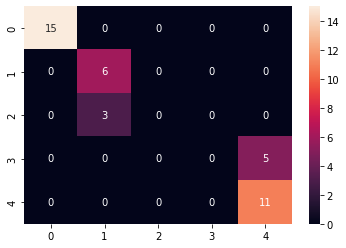

In [ ]:
# Visualize With Heatmap
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


data = {'y_actual': y_test_oe.flatten(),'y_predicted': d_tree_predict}

df = pd.DataFrame(data, columns = ['y_actual', 'y_predicted'])
sn.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_test_oe, d_tree_predict, average='micro')

0.8

In [ ]:
recall_score(y_test_oe, d_tree_predict, average='micro')

0.8

In [ ]:
# From recall & precision we've got F1 Score
matrix = classification_report(y_test_oe, d_tree_predict)
print('Classification report: \n', matrix)

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.69      1.00      0.81        11

    accuracy                           0.80        40
   macro avg       0.47      0.60      0.52        40
weighted avg       0.66      0.80      0.72        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
print("MAE:")
print(MAE(y_test_oe, d_tree_predict))

MAE:
0.2


## Graph Visualization with Graphviz For Decision Tree
For convert to images use this link https://onlineconvertfree.com/converter/images/

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtree_model,
    out_file = "drugs200.dot",
    feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', ',Na_to_K'],
    class_names = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],
    rounded= True,
    filled =True)

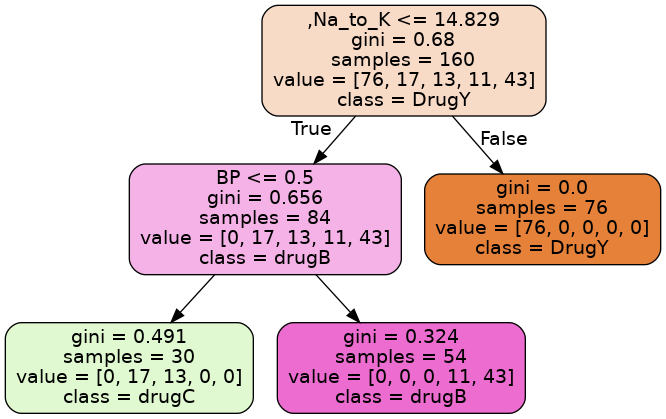

# RandomForestClassifier (5 Features & OE)
Accuracy: 100% ??

F1-Score: 1 ??

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_copy, y_LE, train_size=0.8, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
RF4classifier = RandomForestClassifier(max_leaf_nodes=10).fit(X_train_rf, y_train_rf)
scores = cross_val_score(RF4classifier, X_train_rf, y_train_rf, cv=5)
scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

array([0.96875, 1.     , 1.     , 0.96875, 0.9375 ])

In [ ]:
RF4classifier.score(X_test_rf, y_test_rf)

1.0

# RandomForestClassifier (2 Features & OE)
Accuracy: 70%

F1-score: 0-1

In [ ]:
X_2_train_oe, X_2_test_oe, y_2_train_oe, y_2_test_oe = train_test_split(X_2_copy, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
X_2_copy

,Cholesterol,Na_to_K
0,0.0,25.355
1,0.0,13.093
2,0.0,10.114
3,0.0,7.798
4,0.0,18.043
...,...,...
195,0.0,11.567
196,0.0,12.006
197,0.0,9.894
198,1.0,14.020


In [ ]:
y_LE.shape

(200, 1)

In [ ]:
X_2_train_oe.shape

(160, 2)

In [ ]:
X_2_test_oe.shape

(40, 2)

In [ ]:
y_2_train_oe.shape

(160, 1)

In [ ]:
y_2_test_oe.shape

(40, 1)

In [ ]:
X_2_test_oe.shape

(40, 2)

In [ ]:
X_2_train_oe

,Cholesterol,Na_to_K
79,1.0,10.840
197,0.0,9.894
38,1.0,9.709
24,0.0,33.486
122,0.0,22.456
...,...,...
106,0.0,11.953
14,0.0,12.703
92,0.0,29.450
179,0.0,15.891


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(n_estimators=1)
rfc_2.fit(X_2_train_oe, y_2_train_oe)
pred_rfc_oe_2 =  rfc_2.predict(X_2_test_oe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import accuracy_score
print(classification_report(y_2_test_oe, pred_rfc_oe_2))
print(confusion_matrix(y_2_test_oe, pred_rfc_oe_2))
print('accuracy: ', accuracy_score(y_2_test_oe, pred_rfc_oe_2))
from sklearn.metrics import mean_absolute_error as MAE
print("MAE:")
print(MAE(y_2_test_oe, pred_rfc_oe_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.40      0.33      0.36         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.53      0.73      0.62        11

    accuracy                           0.62        40
   macro avg       0.39      0.41      0.40        40
weighted avg       0.58      0.62      0.60        40

[[15  0  0  0  0]
 [ 0  2  2  1  1]
 [ 0  0  0  0  3]
 [ 0  1  1  0  3]
 [ 0  2  1  0  8]]
accuracy:  0.625
MAE:
0.675


# SGD (2 Features & OE)
Accuracy 65%

F1-score:0-0.97

In [ ]:
X_2_copy

,Cholesterol,Na_to_K
0,0.0,25.355
1,0.0,13.093
2,0.0,10.114
3,0.0,7.798
4,0.0,18.043
...,...,...
195,0.0,11.567
196,0.0,12.006
197,0.0,9.894
198,1.0,14.020


In [ ]:
X_2_train_oe

,Cholesterol,Na_to_K
79,1.0,10.840
197,0.0,9.894
38,1.0,9.709
24,0.0,33.486
122,0.0,22.456
...,...,...
106,0.0,11.953
14,0.0,12.703
92,0.0,29.450
179,0.0,15.891


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_2_train_oe, y_2_train_oe)
pred_sgd_oe_2 =  sgd_clf.predict(X_2_test_oe)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_2_test_oe, pred_sgd_oe_2))
print(confusion_matrix(y_2_test_oe, pred_sgd_oe_2))
accuracy_score(y_2_test_oe, pred_sgd_oe_2)
print(MAE(y_2_test_oe, pred_sgd_oe_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.50      0.20      0.29         5
           4       0.48      1.00      0.65        11

    accuracy                           0.68        40
   macro avg       0.40      0.44      0.39        40
weighted avg       0.57      0.68      0.59        40

[[15  0  0  0  0]
 [ 0  0  0  1  5]
 [ 0  0  0  0  3]
 [ 0  0  0  1  4]
 [ 0  0  0  0 11]]
0.675


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# OHE Using Features (5)
OH_X

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (X.dtypes == 'object')
object_cols_X = list(s[s].index)

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X]))

OH_cols.index = X.index

num_X = X.drop(object_cols_X, axis=1)

OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X

,Age,Na_to_K,0,1,2,3,4,5,6
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# OHE Using Features (2)
OH_X_2

In [ ]:
X_2_copy = X_2.copy()
X_2_copy.head(2)

,Cholesterol,Na_to_K
0,HIGH,25.355
1,HIGH,13.093


In [ ]:
s = (X_2_copy.dtypes == 'object')
object_cols_X_ohe = list(s[s].index)

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols_2 = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X_ohe]))

In [ ]:
object_cols_X_ohe

['Cholesterol']

In [ ]:
X_Na_to_K = dataframe["Na_to_K"]

In [ ]:
OH_X_2 = pd.concat([X_Na_to_K, OH_cols], axis=1)
OH_X_2

,Na_to_K,0,1,2,3,4,5,6
0,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
195,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# RandomForestClassifier (5 Features & OHE)
Accuracy:92%

F1-score:0.75-1

In [ ]:
X_copy

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [ ]:
# Train test split
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_copy, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
rfc_ohe = RandomForestClassifier(n_estimators=1)
rfc_ohe.fit(X_train_ohe, y_train_ohe)
pred_rfc_ohe = rfc_ohe.predict(X_test_ohe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test_ohe, pred_rfc_ohe))
print(confusion_matrix(y_test_ohe, pred_rfc_ohe))
print('accuracy: ', accuracy_score(y_test_ohe, pred_rfc_ohe))
from sklearn.metrics import mean_absolute_error as MAE
print("MAE:")
print(MAE(y_test_ohe, pred_rfc_ohe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.71      0.83      0.77         6
           2       0.50      0.67      0.57         3
           3       1.00      0.60      0.75         5
           4       0.91      0.91      0.91        11

    accuracy                           0.88        40
   macro avg       0.82      0.80      0.80        40
weighted avg       0.89      0.88      0.88        40

[[15  0  0  0  0]
 [ 0  5  1  0  0]
 [ 0  0  2  0  1]
 [ 0  1  1  3  0]
 [ 0  1  0  0 10]]
accuracy:  0.875
MAE:
0.225


# SGD (2 Features & OHE)
Accuracy: 75%

F1-score: 0-0.94

In [ ]:
X_2_train_ohe_sgd, X_2_test_ohe_sgd, y_2_train_ohe_sgd, y_2_test_ohe_sgd = train_test_split(OH_X_2, y_LE, train_size=0.8, test_size=0.2, random_state=42)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_2_train_ohe_sgd, y_2_train_ohe_sgd)
pred_sgd_ohe_2 =  sgd_clf.predict(X_2_test_ohe_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import accuracy_score
print(classification_report(y_2_test_ohe_sgd, pred_sgd_ohe_2))
print(confusion_matrix(y_2_test_ohe_sgd, pred_sgd_ohe_2))
print('accuracy: ', accuracy_score(y_2_test_ohe_sgd, pred_sgd_ohe_2))
from sklearn.metrics import mean_absolute_error as MAE
print("MAE:")
print(MAE(y_2_test_ohe_sgd, pred_sgd_ohe_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.48      1.00      0.65        11

    accuracy                           0.65        40
   macro avg       0.30      0.40      0.33        40
weighted avg       0.51      0.65      0.55        40

[[15  0  0  0  0]
 [ 0  0  1  0  5]
 [ 0  1  0  0  2]
 [ 0  0  0  0  5]
 [ 0  0  0  0 11]]
accuracy:  0.65
MAE:
0.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
